## TUTORIAL OF PYTORCH API 06
## TRANSFER LEARNING

In [ ]:
import os
import torch
import torchvision
import matplotlib.pyplot as plt
import numpy as np
from torchsummary import summary
import shutil
import time
import copy
from torch.nn import Module


## 0_Setup GPU

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

## 1_Load dataset

In [ ]:
BASE_DIR = '/content/drive/MyDrive/star-wars-images/'
names = ["YODA", "LUKE SKYWALKER", "R2-D2", "MACE WINDU", "GENERAL GRIEVOUS"]

torch.manual_seed(1)

In [ ]:
# Reorganize the folder structure:
if not os.path.isdir(BASE_DIR + 'train/'):
    for name in names:
        os.makedirs(BASE_DIR + 'train/' + name)
        os.makedirs(BASE_DIR + 'val/' + name)
        os.makedirs(BASE_DIR + 'test/' + name)

In [ ]:
# Make the image files
orig_folders = ["0001/", "0002/", "0003/", "0004/", "0005/"]
for folder_idx, folder in enumerate(orig_folders):
    files = os.listdir(BASE_DIR + folder)
    number_of_images = len([name for name in files])
    n_train = int((number_of_images * 0.6) + 0.5)
    n_valid = int((number_of_images*0.25) + 0.5)
    n_test = number_of_images - n_train - n_valid
    print(number_of_images, n_train, n_valid, n_test)
    for idx, file in enumerate(files):
        file_name = BASE_DIR + folder + file
        if idx < n_train:
            shutil.move(file_name, BASE_DIR + "train/" + names[folder_idx])
        elif idx < n_train + n_valid:
            shutil.move(file_name, BASE_DIR + "val/" + names[folder_idx])
        else:
            shutil.move(file_name, BASE_DIR + "test/" + names[folder_idx])

0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


In [ ]:
X_train = torchvision.datasets.ImageFolder(
    root=BASE_DIR+'/train',
    transform=torchvision.transforms.Compose([
        torchvision.transforms.ToTensor(),
        torchvision.transforms.Resize((256,256))
        ])
)
X_val = torchvision.datasets.ImageFolder(
    root=BASE_DIR+'/val',
    transform=torchvision.transforms.Compose([
        torchvision.transforms.ToTensor(),
        torchvision.transforms.Resize((256,256))
        ])
)
X_test = torchvision.datasets.ImageFolder(
    root=BASE_DIR+'/test',
    transform=torchvision.transforms.Compose([
        torchvision.transforms.ToTensor(),
        torchvision.transforms.Resize((256,256))
        ])
)

In [ ]:
x_train = torch.utils.data.DataLoader(
    dataset=X_train,
    batch_size=4,
    shuffle=True,

)
x_val = torch.utils.data.DataLoader(
    dataset=X_val,
    batch_size=4,
    shuffle=False
)
x_test = torch.utils.data.DataLoader(
    dataset=X_test,
    batch_size=4,
    shuffle=False
)

## 2_Explore dataset

In [ ]:
print("Length of batch_size training examples: ", len(X_train))
print("Length of batch_size test examples: ", len(X_test))


Length of batch_size training examples:  37
Length of batch_size test examples:  10


In [ ]:
print("Number of total training examples: ", 4*len(X_train))
print("Number of total test examples: ", 4*len(X_test))

Number of total training examples:  148
Number of total test examples:  40


In [ ]:
examples = iter(x_val)
example = next(examples)
images, labels = example
print("Shape of examples in one batch: ", images.shape)
print("Shape of label examples in one batch: ", labels.shape)

Shape of examples in one batch:  torch.Size([4, 3, 256, 256])
Shape of label examples in one batch:  torch.Size([4])


In [ ]:
print("One image shape: ",images[0].shape)
print("One label shape: ", labels[0].shape)
print("First label image: ", labels[0])
print("First image: \n",images[0])

One image shape:  torch.Size([3, 256, 256])
One label shape:  torch.Size([])
First label image:  tensor(4)
First image: 
 tensor([[[0.6779, 0.6757, 0.6711,  ..., 0.6064, 0.6148, 0.6215],
         [0.6751, 0.6710, 0.6667,  ..., 0.6099, 0.6174, 0.6245],
         [0.6716, 0.6687, 0.6640,  ..., 0.6105, 0.6183, 0.6260],
         ...,
         [0.7015, 0.7112, 0.7140,  ..., 0.7160, 0.7066, 0.7044],
         [0.6980, 0.6974, 0.6955,  ..., 0.7067, 0.6990, 0.7024],
         [0.6832, 0.6778, 0.6762,  ..., 0.6923, 0.6833, 0.6865]],

        [[0.7210, 0.7188, 0.7143,  ..., 0.6416, 0.6381, 0.6332],
         [0.7182, 0.7141, 0.7099,  ..., 0.6398, 0.6374, 0.6336],
         [0.7148, 0.7118, 0.7071,  ..., 0.6355, 0.6328, 0.6317],
         ...,
         [0.7417, 0.7514, 0.7542,  ..., 0.7368, 0.7282, 0.7260],
         [0.7441, 0.7435, 0.7416,  ..., 0.7184, 0.7113, 0.7146],
         [0.7303, 0.7249, 0.7232,  ..., 0.6968, 0.6854, 0.6882]],

        [[0.7289, 0.7267, 0.7221,  ..., 0.6116, 0.6127, 0.6123],
 

In [ ]:
class_names = X_train.classes
print(len(class_names))
print(class_names)

5
['GENERAL GRIEVOUS', 'LUKE SKYWALKER', 'MACE WINDU', 'R2-D2', 'YODA']


## 3_Normalize dataset(Skip Step)

## 4_Plot to visualize some examples

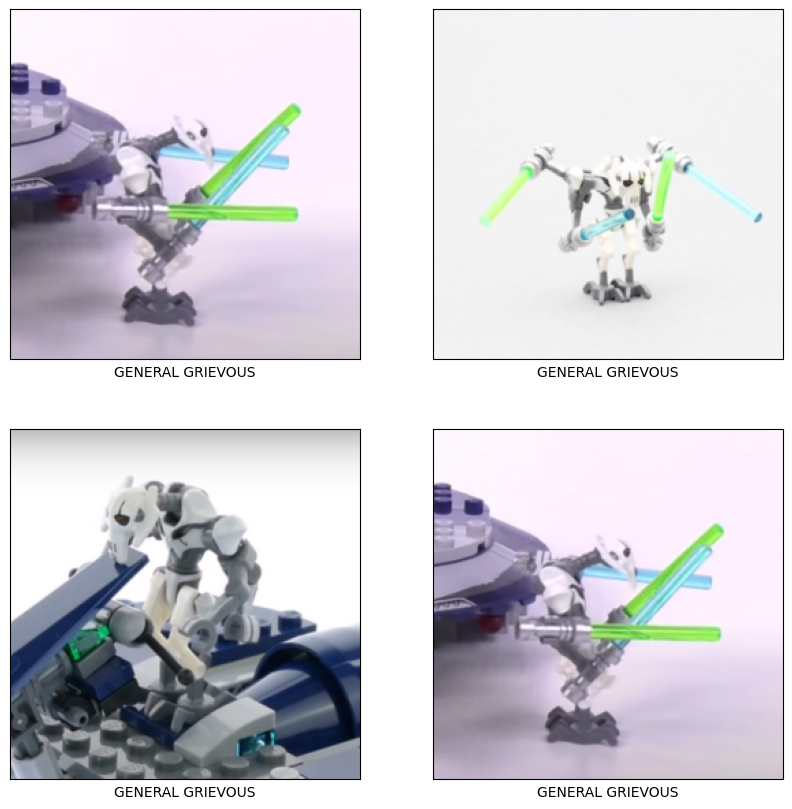

In [ ]:
def plot_examples(images, class_names, labels):
    plt.figure(figsize=(10,10))
    for i in range(4):
        plt.subplot(2,2, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i].permute(1,2,0).numpy(), cmap=plt.cm.binary)
        plt.xlabel(class_names[labels[i]])
plot_examples(images, class_names, labels)

## 5_Build Model

In [ ]:
def train_model(model, losses, optimizer, scheduler, epochs):
  since = time.time()
  best_model_wts = copy.deepcopy(model.state_dict())
  best_accuracy = 0.0

  for epoch in range(epochs):
    print("Epoch {}/{}".format(epoch, epochs - 1))
    print("-"*10)

    for phase in ['train','val']:
      if phase == 'train':
        model.train()
        dataset = x_train
      else:
        model.eval()
        dataset = x_val

      run_loss = 0.0
      run_accuracy = 0.0
      n_sample = 0
      for i, (images, labels) in enumerate(dataset):
        images = images.to(device)
        labels = labels.to(device)
        n_sample += len(labels)

        #forward and track history
        with torch.set_grad_enabled(phase == 'train'):
          outputs = model(images)
          loss = losses(outputs, labels)
          _, predictions = torch.max(outputs,1)
          #backward
          if phase == 'train':
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()

        #compute loss and accuracy training
        run_loss += loss.item() * images.size(0)
        run_accuracy += torch.sum(predictions == labels.data)

      if phase == 'train':
        scheduler.step()

      epoch_loss = run_loss / n_sample
      epoch_accuracy = run_accuracy / n_sample

      print('{} Loss: {:.4f} Acc: {:.4f}'.format(phase, epoch_loss, epoch_accuracy))

      if phase == 'val' and epoch_accuracy > best_accuracy:
        best_accuracy = epoch_accuracy
        best_model_wts = copy.deepcopy(model.state_dict())

  time_elapsed = time.time() - since
  print('Training complete in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))
  print('Best Val Accuracy: {:4f}'.format(best_accuracy))
  # load best model weights
  model.load_state_dict(best_model_wts)
  return model

In [ ]:
model_resnet = torchvision.models.resnet18(pretrained=True)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
summary(model_resnet, (3,256,256))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 128, 128]           9,408
       BatchNorm2d-2         [-1, 64, 128, 128]             128
              ReLU-3         [-1, 64, 128, 128]               0
         MaxPool2d-4           [-1, 64, 64, 64]               0
            Conv2d-5           [-1, 64, 64, 64]          36,864
       BatchNorm2d-6           [-1, 64, 64, 64]             128
              ReLU-7           [-1, 64, 64, 64]               0
            Conv2d-8           [-1, 64, 64, 64]          36,864
       BatchNorm2d-9           [-1, 64, 64, 64]             128
             ReLU-10           [-1, 64, 64, 64]               0
       BasicBlock-11           [-1, 64, 64, 64]               0
           Conv2d-12           [-1, 64, 64, 64]          36,864
      BatchNorm2d-13           [-1, 64, 64, 64]             128
             ReLU-14           [-1, 64,

In [ ]:
model_transfer = torch.nn.Sequential(*list(model_resnet.children())[:-2])
summary(model_transfer, (3,256,256))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 128, 128]           9,408
       BatchNorm2d-2         [-1, 64, 128, 128]             128
              ReLU-3         [-1, 64, 128, 128]               0
         MaxPool2d-4           [-1, 64, 64, 64]               0
            Conv2d-5           [-1, 64, 64, 64]          36,864
       BatchNorm2d-6           [-1, 64, 64, 64]             128
              ReLU-7           [-1, 64, 64, 64]               0
            Conv2d-8           [-1, 64, 64, 64]          36,864
       BatchNorm2d-9           [-1, 64, 64, 64]             128
             ReLU-10           [-1, 64, 64, 64]               0
       BasicBlock-11           [-1, 64, 64, 64]               0
           Conv2d-12           [-1, 64, 64, 64]          36,864
      BatchNorm2d-13           [-1, 64, 64, 64]             128
             ReLU-14           [-1, 64,

In [ ]:
for param in model_transfer.parameters():
  param.requires_grad = False

summary(model_transfer, (3,256,256))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 128, 128]           9,408
       BatchNorm2d-2         [-1, 64, 128, 128]             128
              ReLU-3         [-1, 64, 128, 128]               0
         MaxPool2d-4           [-1, 64, 64, 64]               0
            Conv2d-5           [-1, 64, 64, 64]          36,864
       BatchNorm2d-6           [-1, 64, 64, 64]             128
              ReLU-7           [-1, 64, 64, 64]               0
            Conv2d-8           [-1, 64, 64, 64]          36,864
       BatchNorm2d-9           [-1, 64, 64, 64]             128
             ReLU-10           [-1, 64, 64, 64]               0
       BasicBlock-11           [-1, 64, 64, 64]               0
           Conv2d-12           [-1, 64, 64, 64]          36,864
      BatchNorm2d-13           [-1, 64, 64, 64]             128
             ReLU-14           [-1, 64,

In [ ]:
model_transfer.add_module(name='flatten', module=torch.nn.Flatten())
model_transfer.add_module(name='fc1',module=torch.nn.Linear(in_features=512*8*8, out_features=5))

In [ ]:
summary(model_transfer, (3,256,256))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 128, 128]           9,408
       BatchNorm2d-2         [-1, 64, 128, 128]             128
              ReLU-3         [-1, 64, 128, 128]               0
         MaxPool2d-4           [-1, 64, 64, 64]               0
            Conv2d-5           [-1, 64, 64, 64]          36,864
       BatchNorm2d-6           [-1, 64, 64, 64]             128
              ReLU-7           [-1, 64, 64, 64]               0
            Conv2d-8           [-1, 64, 64, 64]          36,864
       BatchNorm2d-9           [-1, 64, 64, 64]             128
             ReLU-10           [-1, 64, 64, 64]               0
       BasicBlock-11           [-1, 64, 64, 64]               0
           Conv2d-12           [-1, 64, 64, 64]          36,864
      BatchNorm2d-13           [-1, 64, 64, 64]             128
             ReLU-14           [-1, 64,

## 6_Select Hyperparameters for Model

In [ ]:
epochs = 10
learning_rate = 0.001

In [ ]:
losses = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_transfer.parameters(), lr=learning_rate)

In [ ]:
#step size each 7 epoch decay learning rate
step_lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

In [ ]:
model = train_model(model_transfer, losses, optimizer, scheduler=step_lr_scheduler, epochs=epochs)

Epoch 0/9
----------
train Loss: 0.0547 Acc: 0.9730
val Loss: 0.3161 Acc: 0.9375
Epoch 1/9
----------
train Loss: 1.0882 Acc: 0.9459
val Loss: 3.8186 Acc: 0.7500
Epoch 2/9
----------
train Loss: 0.5327 Acc: 0.9189
val Loss: 2.5473 Acc: 0.8750
Epoch 3/9
----------
train Loss: 0.0256 Acc: 0.9730
val Loss: 3.0214 Acc: 0.8750
Epoch 4/9
----------
train Loss: 0.0000 Acc: 1.0000
val Loss: 2.4555 Acc: 0.8750
Epoch 5/9
----------
train Loss: 0.0000 Acc: 1.0000
val Loss: 2.4801 Acc: 0.8750
Epoch 6/9
----------
train Loss: 0.2573 Acc: 0.9459
val Loss: 3.1390 Acc: 0.8750
Epoch 7/9
----------
train Loss: 0.1585 Acc: 0.9730
val Loss: 2.9866 Acc: 0.8750
Epoch 8/9
----------
train Loss: 0.0000 Acc: 1.0000
val Loss: 2.4196 Acc: 0.8750
Epoch 9/9
----------
train Loss: 0.0000 Acc: 1.0000
val Loss: 2.8470 Acc: 0.8750
Training complete in 1m 16s
Best Val Accuracy: 0.937500


## 7_Evaluation

In [ ]:
batch_size = 4
model.eval()
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    n_class_correct = [0 for i in range(len(class_names))]
    n_class_sample = [0 for i in range(len(class_names))]
    for i, (images, labels) in enumerate(x_test):
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predictions = torch.max(outputs, 1)
        #print(f"Prediction at batch {i}-th {predictions}")
        n_samples += len(labels)
        n_correct += (predictions == labels).sum().item()
        if len(labels) == 4:
            for j in range(batch_size):
                label = labels[j]
                pred = predictions[j]
                if(pred == label):
                    n_class_correct[label] += 1
                n_class_sample[label] += 1
        else:
            for j in range(len(labels)):
                label = labels[j]
                pred = predictions[j]
                if(pred == label):
                    n_class_correct[label] += 1
                n_class_sample[label] += 1
accuracy = 100*n_correct / n_samples
print("Accuracy of Model: ", accuracy)

Accuracy of Model:  60.0
